****INTRODUCTION****

GOAL : **Customer Segmentation using clustering **

Customer Segmentation is the task of subdividing a market into discrete customer groups that each group share some similar characteristics. Customer Segmentation is most effective when a company tailors offerings to segments that are the most profitable and serves them with distinct competitive advantages. This prioritization can help companies develop marketing campaigns and pricing strategies to extract maximum value from both high and lowprofit customers.

Thanks to yhat I am using a clean dataset which is really dificult to find. Real data are really messy when it comes to customer data. Let us first analyse the [data](http://blog.yhat.com/static/misc/data/WineKMC.xlsx). 

In [1]:
import pandas as pd 
import matplotlib.pyplot as pt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
dataset_offer = pd.read_excel("WineKMC.xlsx")
dataset_transaction = pd.read_excel("WineKMC.xlsx",sheetname=1)
dataset_transaction['count']=1
dataset_offer.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [3]:
dataset_transaction.head()

,Customer Last Name,Offer #,count
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


Now the title have complex name. Let's ahead and create simple column name for both our dataframe.

In [4]:
dataset_offer.columns = ["id","Campaign","Var","min_qty","dis","origin","peak"]
dataset_transaction.columns = ["last_name","id","count"]
df = pd.merge(dataset_offer,dataset_transaction)

In [5]:
df.head()

,id,Campaign,Var,min_qty,dis,origin,peak,last_name,count
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


We merged both the sheet. The data is about the information on marketing newsletters campaigns (e-mail offers sent) and transaction level data from customers (which offer customers responded to). Lets us try to cluster similar minded customers together. We can then study those groups for patterns and trends which can help us formulate future offers.

Approach: Lets us convert each customer into 'bag of offer' row i.e. each row for customer and value = 1 if he transacted for that offer and 0 if he doesn't. We can then try to find similar customer using distance between these rows. 

In [6]:
bof = df.pivot_table(index=['last_name'], columns=['id'], values='count')
boP = df.pivot_table(index=['last_name'], columns=['origin'], values='count')
bof = bof.fillna(0)
boP=boP.fillna(0)

In [7]:
final_df = pd.concat([bof, boP], axis=1, join_axes=[bof.index])
final_df.head()

,1,2,3,4,5,6,7,8,9,10,...,32,Australia,California,Chile,France,Germany,Italy,New Zealand,Oregon,South Africa
last_name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


We have also add one hot encoding for the places(origin)

Lets use KMeans for clustering these hot encoded vectors.

In [8]:
model = KMeans(n_clusters=10, max_iter=1000)
kmeans = model.fit(final_df)
kmeans.labels_

array([3, 9, 0, 4, 4, 1, 0, 2, 2, 4, 1, 0, 4, 1, 1, 0, 1, 0, 1, 3, 4, 2, 6,
       1, 0, 9, 9, 1, 9, 5, 4, 2, 1, 6, 1, 3, 1, 4, 1, 3, 0, 0, 2, 7, 3, 6,
       4, 4, 9, 1, 3, 7, 1, 0, 2, 2, 0, 4, 3, 2, 1, 2, 1, 3, 3, 5, 0, 9, 1,
       9, 9, 9, 6, 3, 1, 4, 5, 2, 3, 5, 8, 8, 9, 0, 2, 2, 3, 5, 3, 2, 6, 3,
       1, 4, 3, 3, 2, 1, 6, 7])

Let's add these prediction as one of the column to our data frame df and visualize our data.

In [10]:
final_df['cluster'] = model.fit_predict(final_df)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
final_df['x'] = pca.fit_transform(final_df)[:,0]
final_df['y'] = pca.fit_transform(final_df)[:,1]
final_df.head()
show_df = final_df[['cluster','x','y']]
show_df.head()

,cluster,x,y
last_name,,,
Adams,7,3.903111,0.062657
Allen,5,-0.578388,-0.998559
Anderson,4,-2.073043,-1.095007
Bailey,6,0.817684,-0.957005
Baker,6,0.823004,-0.989131


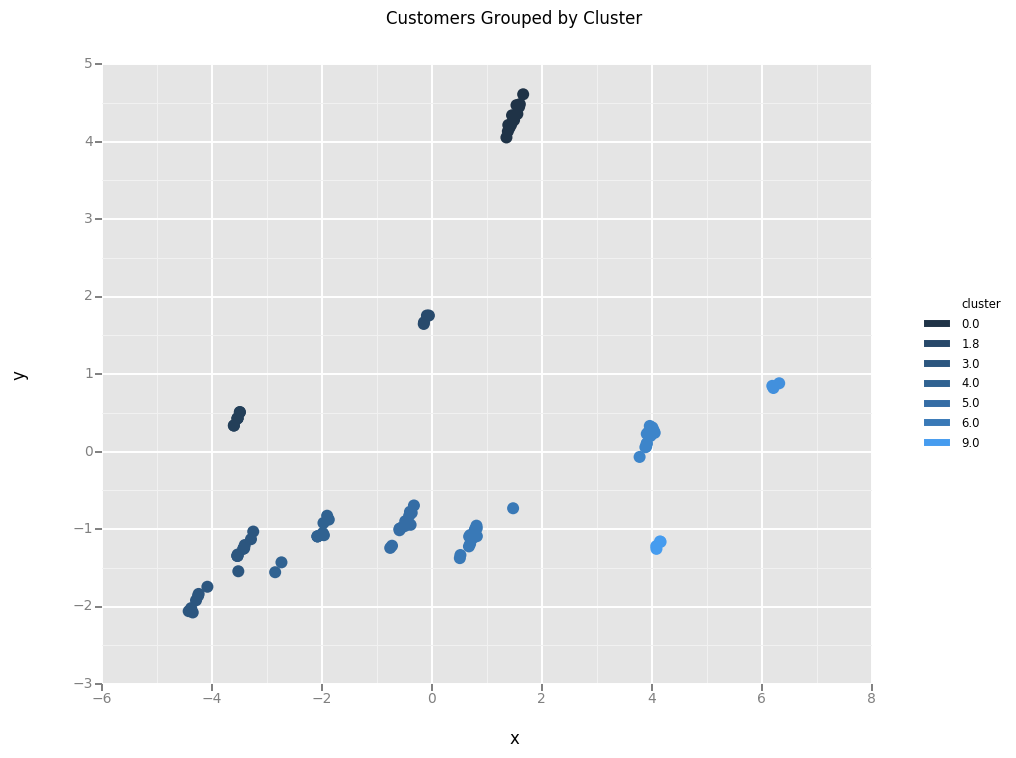

<ggplot: (-9223371869959605879)>

In [16]:
#pt.scatter(show_df.x, show_df.y, s=300, c='cluster')
from ggplot import *
ggplot(show_df, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster")